In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

from scipy.stats import norm
import pandas as pd
import statsmodels

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_74781/600908894.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# First simulating an AR(2) process

## Creating the data

In [27]:
mu = 0
sd = 5
beta_1 = .5
beta_2 = .2


num_observations = 10000
x = np.arange(num_observations)
y = np.zeros(num_observations)

epsilon_dist = norm(0, sd)


y[0] = mu + epsilon_dist.rvs()
y[1] = mu + (y[0] - mu) * beta_1 + epsilon_dist.rvs()

for i in range(2, num_observations):
    y[i] = mu + (y[i-1] - mu) * beta_1 + (y[i-2] - mu) * beta_2 + epsilon_dist.rvs()

    
df = pd.DataFrame(
    {
        'x': x,
        'y': y
    }
)
    

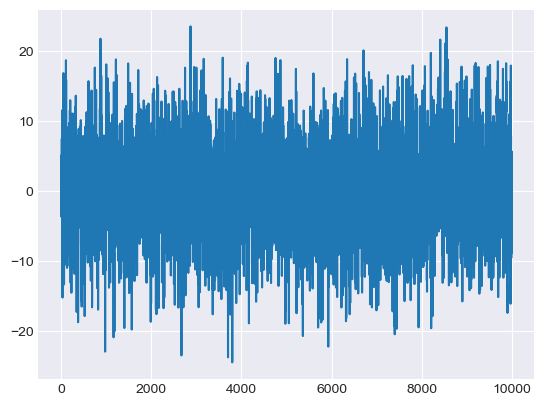

In [28]:
plt.plot(df['x'], df['y'])

# Testing whether data is stationary
Todo, dig more into adfuller test. I copy/pasta'ed this block from somewhere else and don't fully understand it

In [29]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['y'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [30]:
adfuller_test(df['y'])

ADF Test Statistic : -34.818868976711016
p-value : 0.0
#Lags Used : 2
Number of Observations Used : 9997
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


# Analysis using statsmodels

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [32]:
model=ARIMA(df['y'],order=(2,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30292.522
Date:                Tue, 08 Nov 2022   AIC                          60593.044
Time:                        19:10:16   BIC                          60621.885
Sample:                             0   HQIC                         60602.807
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0909      0.159      0.572      0.567      -0.220       0.402
ar.L1          0.4997      0.010     51.199      0.000       0.481       0.519
ar.L2          0.1849      0.010     18.670      0.000       0.166       0.204
sigma2        25.0457      0.344     72.702      0.000      24.371      25.721
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.76   Prob(JB):                         0.06
Heteroskedasticity (H):               1.07   Skew:                             0.01
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# First simulating a MA(2) process

## Creating the data

In [33]:
mu = 0
sd = 5
beta_1 = .9
beta_2 = .3


num_observations = 10000
x = np.arange(num_observations)
y = np.zeros(num_observations)

epsilon_dist = norm(0, sd)
epsilon_draws = epsilon_dist.rvs(size=num_observations)

y[0] = mu + epsilon_draws[0]
y[1] = mu + epsilon_draws[1] + beta_1 * epsilon_draws[0]

for i in range(2, num_observations):
    y[i] = mu + epsilon_draws[i] + beta_1 * epsilon_draws[i-1] + beta_2 * epsilon_draws[i-2]

    
df = pd.DataFrame(
    {
        'x': x,
        'y': y
    }
)
    

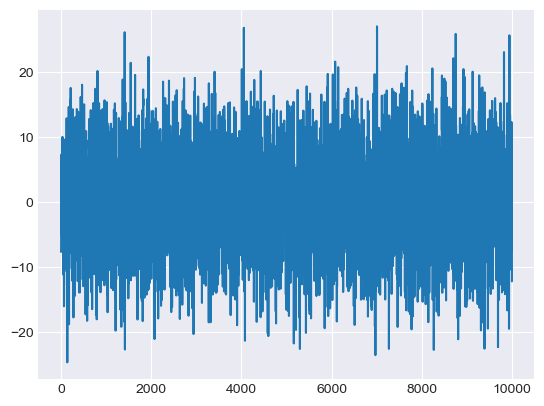

In [34]:
plt.plot(df['y'])

In [35]:
model=ARIMA(df['y'],order=(0,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -30275.696
Date:                Tue, 08 Nov 2022   AIC                          60559.392
Time:                        19:10:17   BIC                          60588.234
Sample:                             0   HQIC                         60569.155
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0963      0.111      0.864      0.388      -0.122       0.315
ma.L1          0.9128      0.009     96.306      0.000       0.894       0.931
ma.L2          0.3185      0.010     33.355      0.000       0.300       0.337
sigma2        24.9573      0.354     70.596      0.000      24.264      25.650
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.86   Prob(JB):                         0.87
Heteroskedasticity (H):               1.04   Skew:                            -0.01
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA process

## Creating the data

In [36]:
mu = 0
sd = 5
AR_beta_1 = -.5
AR_beta_2 = -.05
MA_beta_1 = .4
MA_beta_2 = .6

num_observations = 100
x = np.arange(num_observations)
y = np.zeros(num_observations)

epsilon_dist = norm(0, sd)
epsilon_draws = epsilon_dist.rvs(size=num_observations)

y[0] = mu + epsilon_draws[0]
y[1] = mu + epsilon_draws[1] + MA_beta_1 * epsilon_draws[0] + AR_beta_1 * (y[0]-mu)

for i in range(2, num_observations):
    y[i] = mu + epsilon_draws[i] + MA_beta_1 * epsilon_draws[i-1] + MA_beta_2 * epsilon_draws[i-2] + AR_beta_1 * (y[i-1] - mu) + AR_beta_2 * (y[i-2] - mu)

    
df = pd.DataFrame(
    {
        'x': x,
        'y': y
    }
)
    

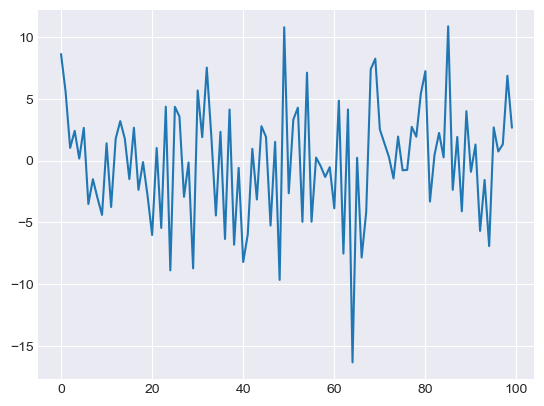

In [37]:
plt.plot(df['y'])

In [38]:
model=ARIMA(df['y'],order=(2,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -283.505
Date:                Tue, 08 Nov 2022   AIC                            579.010
Time:                        19:10:18   BIC                            594.642
Sample:                             0   HQIC                           585.337
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.569      0.053      0.958      -1.085       1.145
ar.L1         -0.4265      0.205     -2.081      0.037      -0.828      -0.025
ar.L2         -0.1724      0.229     -0.754      0.451      -0.620       0.276
ma.L1          0.3574      0.177      2.025      0.043       0.011       0.703
ma.L2          0.6763      0.160      4.230      0.000       0.363       0.990
sigma2        16.8312      2.519      6.682      0.000      11.894      21.768
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.91   Prob(JB):                         0.58
Heteroskedasticity (H):               1.24   Skew:                             0.25
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
x = np.